In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob 
import seaborn as sns
import pandas as pd
import string, os, random
# import scoring metrice
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

punc = string.punctuation
df = pd.read_csv('train.csv')
negative_tweets = pd.read_csv('train.csv')

# Carrying Out Sentiment Analysis

In this analysis, we are going to discuss how to understand the sentiment of a particular sentence or statement. Sentiment analysis is one of the widely used techniques across the industries to understand the sentiments of the customers/users around the products/services. Sentiment analysis gives the sentiment score of a sentence/statement tending toward positive or negative

- The simplest way to do this by using a TextBlob or vedar library.

Let's follow the steps in this section to do sentiment analysis using Textblob. It will provide 2 metrics:

- Polarity = Polarity lies in the range of [-1,1] where 1 means a positive statement and -1 means a negative statement
- Subjectivity = Subjectivity refers to it being a public opinion and not factual information [0,1]

### Step 1:  ٌLoad the dataset

In [2]:
# reading the dataset = pd.read_csv('train.csv')
training_set = pd.read_csv('train.csv')

In [3]:
print(df.shape)
df.head()

(15819, 3)


,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [4]:
df.iloc[0:5]['message'].tolist()

["PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",
 "It's not like we lack evidence of anthropogenic global warming",
 'RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…',
 '#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD',
 "RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight"]

### Step 2:  Get the sentiment scores

In [5]:
# Using a pretrained model from TextBlob to get the sentiment scores:
# import libraries
from textblob import TextBlob

#TextBlob has a pre trained sentiment prediction model
text_data = df['message'].tolist()

# get the sentiment of the first row 
blob = TextBlob(text_data[0])
blob.sentiment

Sentiment(polarity=0.08333333333333333, subjectivity=0.16666666666666666)

In [6]:
#now lets look at the sentiment of the top 5 rows

for i in range(0,5):
    blob = TextBlob(text_data[i])
    print(blob)
    print(blob.sentiment)
    print("*" * 100)

PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable
Sentiment(polarity=0.08333333333333333, subjectivity=0.16666666666666666)
****************************************************************************************************
It's not like we lack evidence of anthropogenic global warming
Sentiment(polarity=0.0, subjectivity=0.0)
****************************************************************************************************
RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…
Sentiment(polarity=-0.3, subjectivity=0.6)
****************************************************************************************************
#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD
Sentiment(polarity=0.5, subjectivity=0.8)
***************************************************

## 2.Feature Engineering

The available data contains only one column - message.

In this section we will create some some additional features using these features. Following list explains different ideas for creating new features.

#### 2.1 Statistical Count Features from Response text

- Word Count - Total number of words in the response
- Character Count - Total number of characters in the response excluding spaces
- Word Density - Average length of the words used in the response
- Punctuation Count - Total number of punctuations used in the response
- Upper-Case to Lower-Case Words ratio - ratio of upper case words used and lower case words used in the text

#### 2.2 Headline Text Features

- Sentiment: Polarity - sentiment value of the response computed using textblob package
- Part of Speech: Nouns to Verbs Ratio - ratio of nouns and verbs used in the text

#### Generate Statistical Count Features

In [7]:
df['message']= df['message'].astype(str)
df['word_count'] = df['message'].apply(lambda x : len(x.split()))
df['char_count'] = df['message'].apply(lambda x : len(x.replace(" ","")))
df['word_density'] = df['word_count'] / (df['char_count'] + 1)
df['punc_count'] = df['message'].apply(lambda x : len([a for a in x if a in punc]))

df[['word_count', 'char_count', 'word_density', 'punc_count']].head(10)

,word_count,char_count,word_density,punc_count
0,19,122,0.154472,12
1,10,53,0.185185,1
2,19,122,0.154472,12
3,15,85,0.174419,8
4,18,105,0.169811,8
5,14,97,0.142857,11
6,16,104,0.152381,8
7,23,130,0.175573,8
8,25,115,0.215517,4
9,15,74,0.200000,2


#### Generate Text Features - Sentiment Polarity

In [8]:
# function to obtain the sentiment of the response using textblob package

# The polarity score is a float within the range [-1.0, 1.0]
# where negative value indicates negative text and positive
# value indicates that the given text is positive.
def get_polarity(text):
    try:
        pol = TextBlob(text).sentiment.polarity
    except:
        pol = 0.0
    return pol


# The subjectivity is a float within the range [0.0, 1.0] where
# 0.0 is very objective and 1.0 is very subjective.
def get_subjectivity(text):
    try:
        subjectivity = TextBlob(text).sentiment.subjectivity
    except:
        subjectivity = 0.0
    return subjectivity

# determine whether response has negative or positive sentiment
def get_sentiment(text):
    if get_polarity(text) < 0.0 :
        return "negative"
    else:
        return "positive"

df['polarity'] = df['message'].apply(get_polarity)
df['subjectivity'] = df['message'].apply(get_subjectivity)
df['sentiment'] = df['message'].apply(get_sentiment)
   
df.tail()

,sentiment,message,tweetid,word_count,char_count,word_density,punc_count,polarity,subjectivity
15814,negative,RT @ezlusztig: They took down the material on ...,22001,22,119,0.183333,11,-0.077778,0.144444
15815,positive,RT @washingtonpost: How climate change could b...,17856,13,107,0.120370,10,0.000000,0.000000
15816,negative,notiven: RT: nytimesworld :What does Trump act...,384248,19,115,0.163793,9,-0.062500,0.237500
15817,negative,RT @sara8smiles: Hey liberals the climate chan...,819732,21,109,0.190909,4,-0.800000,0.800000
15818,positive,RT @Chet_Cannon: .@kurteichenwald's 'climate c...,806319,10,93,0.106383,13,0.000000,0.000000


### 3: Exploratory Data Analysis

In this section, we will explore the dataset and the features

- 3.1. Response Word Count Distribution
- 3.2. Response Character Count Distribution
- 3.3. Response Average Word Density Distribution
- 3.4. Response Punctuation Count Distribution
- 3.5. Top Positive vs Top Negative Words Used in the Responses

#### 3.1. Word Count Distribution

In [9]:
df['word_count'].describe()

count    15819.000000
mean        17.685062
std          4.443909
min          2.000000
25%         15.000000
50%         18.000000
75%         21.000000
max         31.000000
Name: word_count, dtype: float64

Text(0.5, 1.0, 'Word Count of Responses')

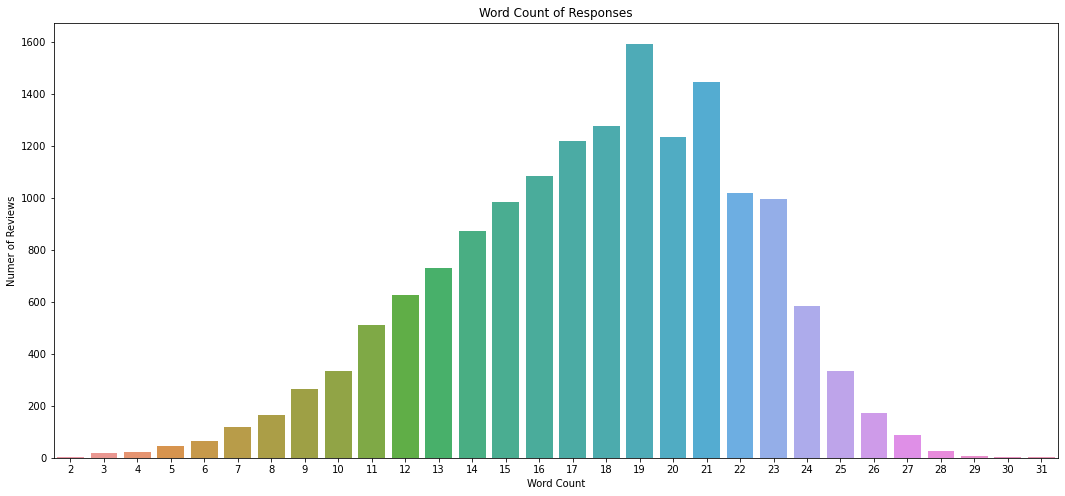

In [10]:
# See the distribution of word_count to recognize different distributions
plt.figure(figsize=(18, 8))
chart = sns.countplot(x='word_count', data=df)
chart.set_xlabel("Word Count")
chart.set_ylabel("Numer of Reviews")
plt.title('Word Count of Responses')

C:\Users\tyron\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


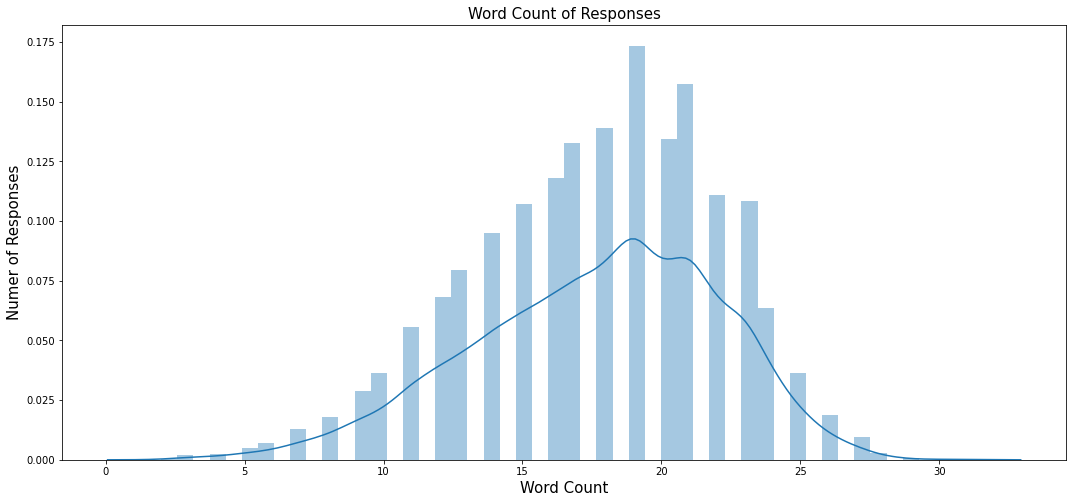

In [11]:
# See the distribution of word_count to recognize different distributions
feature = df['word_count']
plt.figure(figsize=(18, 8))
sns.distplot(feature)
plt.title('Word Count of Responses', fontsize=15);
plt.xlabel('Word Count',fontsize=15)
plt.ylabel('Numer of Responses',fontsize=15)
plt.show()


In [12]:
print(df['word_count'].value_counts()[:10])

19    1592
21    1445
18    1274
20    1234
17    1217
16    1084
22    1016
23     993
15     982
14     873
Name: word_count, dtype: int64


#### Intiution

- The above graph is left-skewed because of its longer left tail
- The graph indicates that the length of messages is around 17 to 18 words

#### 3.2 Character Count Distribution

In [13]:
df['char_count'].describe()

count    15819.000000
mean       107.145837
std         20.082455
min         13.000000
25%         98.500000
50%        114.000000
75%        121.000000
max        194.000000
Name: char_count, dtype: float64

C:\Users\tyron\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


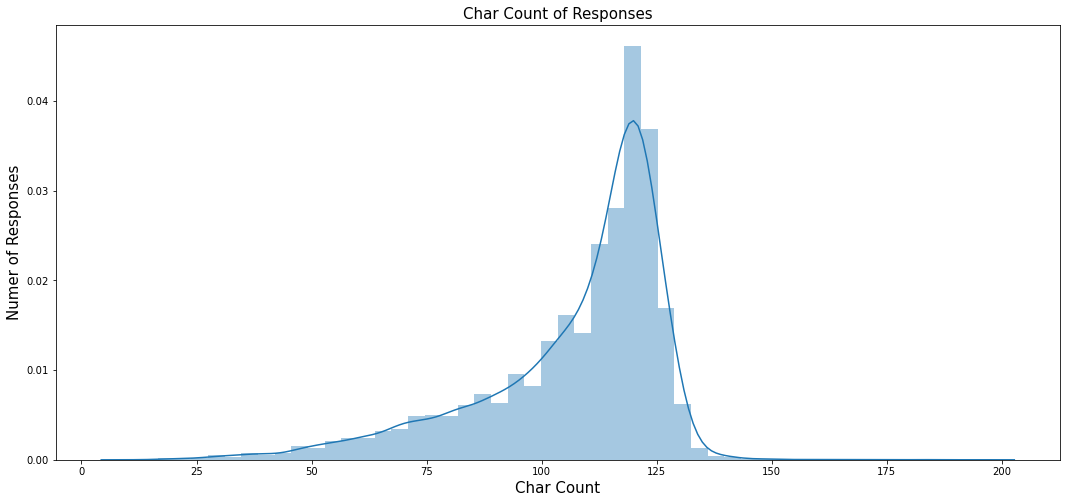

In [14]:
# Let us look at the distribution of char_count to recognize different distributions

feature = df['char_count']
plt.figure(figsize=(18, 8))
sns.distplot(feature)
plt.title('Char Count of Responses', fontsize=15);
plt.xlabel('Char Count',fontsize=15)
plt.ylabel('Numer of Responses',fontsize=15)
plt.show()


#### Intiution 

- Similar to the word count graph, character count graph is left-skewed because of its longer left tail
- Similar to the word countr graph, character count graph also shows the normal distribution with mean character count = 107

In [15]:
print(df['char_count'].value_counts()[:10])

120    717
121    687
119    653
123    607
116    604
122    598
118    586
117    558
124    476
115    445
Name: char_count, dtype: int64


#### 3.3 Word Density among the responses

In [16]:
df['word_density'].describe()

count    15819.000000
mean         0.163892
std          0.030493
min          0.031250
25%          0.142857
50%          0.163462
75%          0.184211
max          0.289474
Name: word_density, dtype: float64

C:\Users\tyron\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


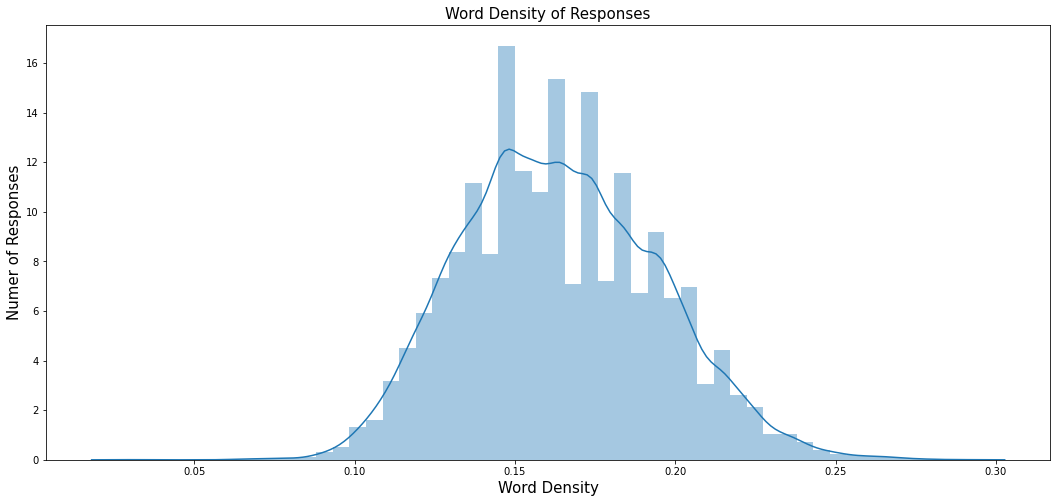

In [17]:
feature = df['word_density']
plt.figure(figsize=(18, 8))
sns.distplot(feature)
plt.title('Word Density of Responses', fontsize=15);
plt.xlabel('Word Density',fontsize=15)
plt.ylabel('Numer of Responses',fontsize=15)
plt.show()

#### Intiution 

- Word Density is an interaction feature and almost always follow a normal distribution
- Word Density of about 0.15 occurs most often in the responses

#### 3.4 Punctuation Count Distribution

In [18]:
df['punc_count'].describe()

count    15819.000000
mean         7.504141
std          3.447935
min          0.000000
25%          5.000000
50%          7.000000
75%         10.000000
max         58.000000
Name: punc_count, dtype: float64

C:\Users\tyron\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


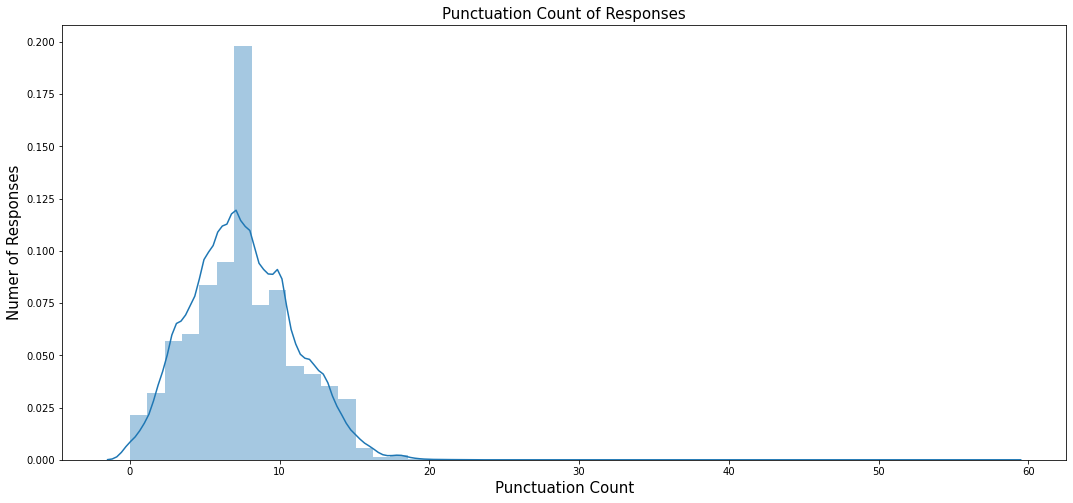

In [19]:
feature = df['punc_count']
plt.figure(figsize=(18, 8))
sns.distplot(feature)
plt.title('Punctuation Count of Responses', fontsize=15);
plt.xlabel('Punctuation Count',fontsize=15)
plt.ylabel('Numer of Responses',fontsize=15)
plt.show()

#### Intiution

- From the graph above, it seems like respondents used between 7-9 punctuation marks 

In [20]:
df['polarity'].describe()

count    15819.000000
mean         0.039096
std          0.231771
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.100000
max          1.000000
Name: polarity, dtype: float64

C:\Users\tyron\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


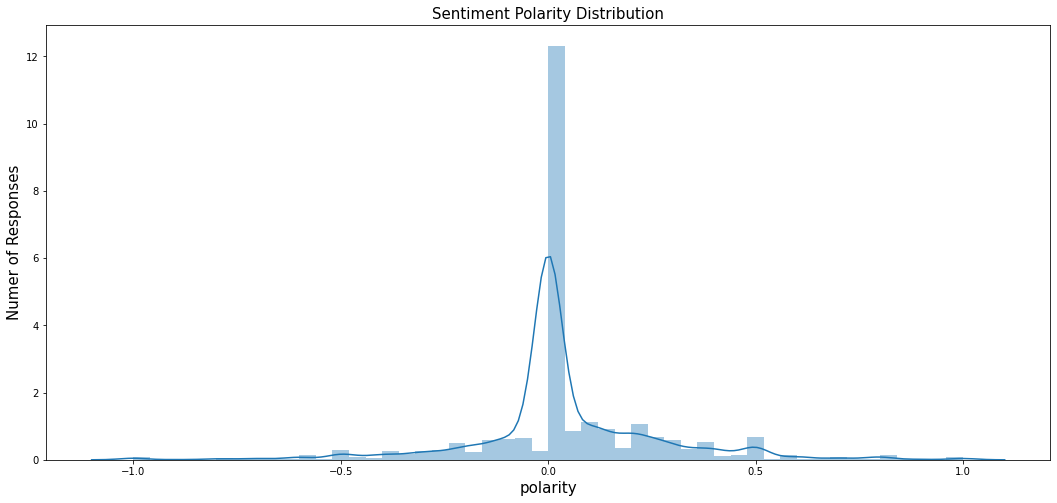

In [21]:
feature = df['polarity']
plt.figure(figsize=(18, 8))
sns.distplot(feature)
plt.title('Sentiment Polarity Distribution', fontsize=15);
plt.xlabel('polarity',fontsize=15)
plt.ylabel('Numer of Responses',fontsize=15)
plt.show()

#### Intiution

- The vast majority of the sentiment polarity scores are zero, meaning most of them are subjective and general views

#### 3.6 The distribution of Responses sentiment

In [22]:
df['sentiment'].value_counts()

positive    12843
negative     2976
Name: sentiment, dtype: int64

(15819,)
positive    12843
negative     2976
Name: sentiment, dtype: int64


C:\Users\tyron\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


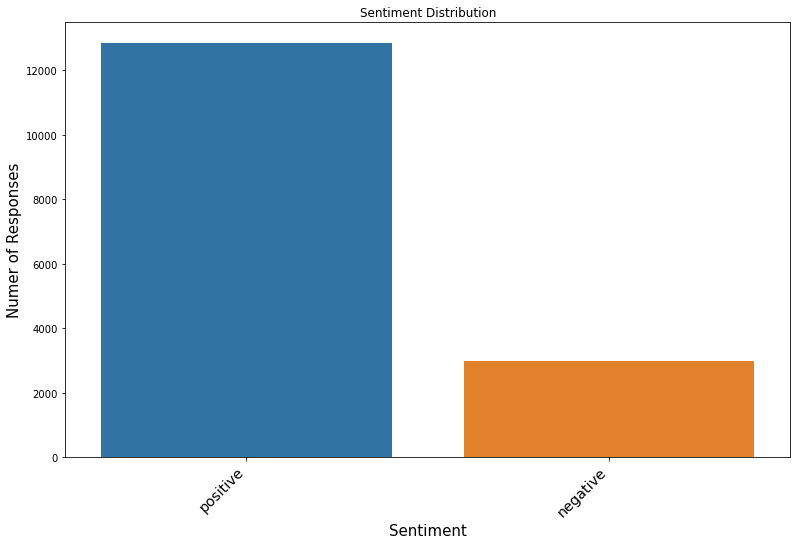

In [23]:
feature = df['sentiment']
print(feature.shape)
print(feature.value_counts())

plt.figure(figsize=(13, 8))
chart = sns.countplot(feature, label="Count", order = feature.value_counts().index)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large' 
)
plt.title('Sentiment Distribution')
chart.set_xlabel("Sentiment",fontsize=15)
chart.set_ylabel("Numer of Responses",fontsize=15)
plt.show()


#### Intiution 

- Vast majority of the sentiment polarity scores are zero, meaning most of them are subjective and general opinions

#### 3.6 Top positive and Top Negative News - World Cloud

#### Top positive responses

In [24]:
sorteddf = df.sort_values(by='polarity')
posdf = sorteddf.tail(5000)
negdf = sorteddf.head(5000)
posdf[['message']].tail(10)

,message
7812,RT @OCTorg: The kids suing the government over...
8542,RT @ALCassady: I'll remember the media and deb...
5486,@NicolaSturgeon you fly 6000 miles.no doubt 1s...
9019,RT @davidsirota: The best way to address inequ...
2422,You can thank climate change for adding delici...
11761,@CalliopeAnim I think debating climate change ...
7798,RT @COP22_NEWS: #climatechange: Breathtaking p...
11139,RT @OCTorg: The kids suing the government over...
10033,#startup #innovation #SAAS #CRO #SEM #CEO #SEO...
15667,RT @BobWieckowskiCA: This article shows why SB...


#### Top Negative Responses

In [25]:
negdf[['message']].head(10)

,message
14259,RT @gserratomarks: Trump's worst nightmare: a ...
8654,Before the evil infesting the EPA kills this. ...
1573,RT @Greenpeace: What can we do in the face of ...
507,11 terrifying climate change facts https://t.c...
13578,RT @JudyMarymary: The hysterical measures to c...
10055,Floods are caused by nasty women not climate c...
15751,Kate is co-director at Women's Environmental N...
7719,RT @nytimesworld: Scientists are pointing to a...
221,"RT @PaulHBeckwith: Listen, folks to a STORY,\n..."
10067,worst defense of climate change skepticism eve...


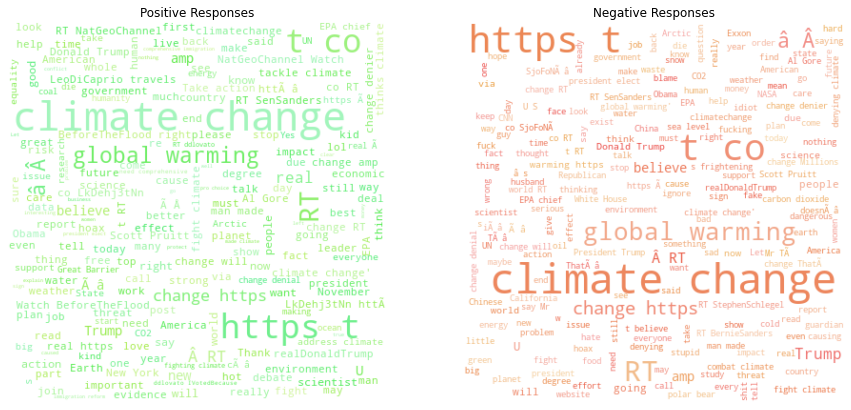

In [26]:
pos_text_cln = " ".join(posdf.message)
neg_text_cln = " ".join(negdf.message)


def green_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(85, 140), random.randint(60, 80))

def red_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(0, 35), random.randint(60, 80))
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 8])
wordcloud1 = WordCloud(background_color='white', height=400).generate(pos_text_cln)

ax1.imshow(wordcloud1.recolor(color_func=green_color, random_state=3),interpolation="bilinear")
ax1.axis('off');
ax1.set_title('Positive Responses');

wordcloud2 = WordCloud(background_color='white', height=400).generate(neg_text_cln)
ax2.imshow(wordcloud2.recolor(color_func=red_color, random_state=3),interpolation="bilinear")
ax2.axis('off');
ax2.set_title('Negative Responses');

#### Intiution

- Many positive and negative responses were about common keywords like climate change, global warming etc.

# Bag-of-Words & N-gram Analysis (with & without stopwords)

In this section, we come to “Text” feature, before explore this feature, we need to extract N-Gram features. N-grams are used to describe the number of words used as observation points, e.g., unigram means singly-worded, bigram means 2-worded phrase, and trigram means 3-worded phrase. In order to do this, we use scikit-learn’s CountVectorizer function. First, it would be interesting to compare unigrams before and after removing stop words.

#### The distribution of top unigrams before removing stop words

climate 13019
change 12645
https 10104
rt 9723
co 9355
the 7771
to 7196
is 4395
of 4225
global 3796
in 3711
warming 3534
and 3027
on 2758
trump 2386
for 1994
it 1937
about 1809
we 1742
that 1697


Text(0, 0.5, 'Count')

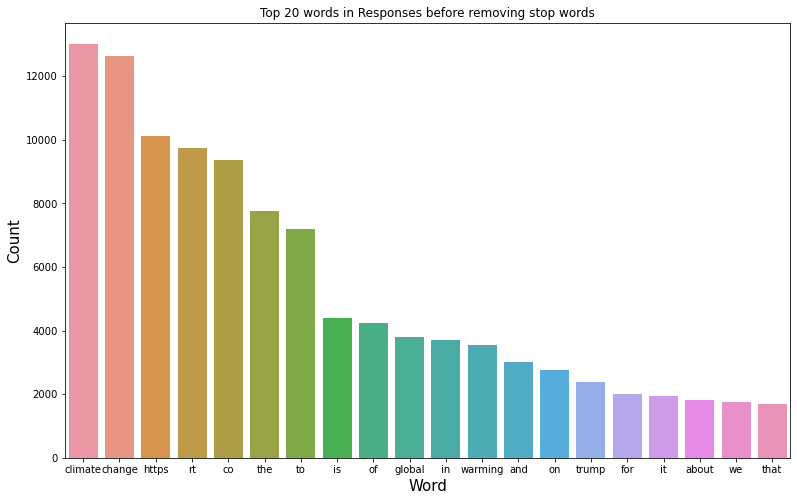

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['message'], 20)
for word, freq in common_words:
    print(word, freq)
    
new_df = pd.DataFrame(common_words, columns = ['message' , 'count'])

stats_data = new_df.groupby('message').sum()['count'].sort_values(ascending=False)

plt.figure(figsize=(13, 8))
chart = sns.barplot(x='message', y='count', data=new_df)
plt.title('Top 20 words in Responses before removing stop words')
chart.set_xlabel("Word",fontsize=15)
chart.set_ylabel("Count",fontsize=15)

#### The distribution of top unigrams before removing after words

climate 13019
change 12645
https 10104
rt 9723
global 3796
warming 3534
trump 2386
believe 1158
amp 940
doesn 803
world 732
real 720
going 670
people 618
just 608
epa 599
president 567
new 542
don 505
science 481


Text(0, 0.5, 'Count')

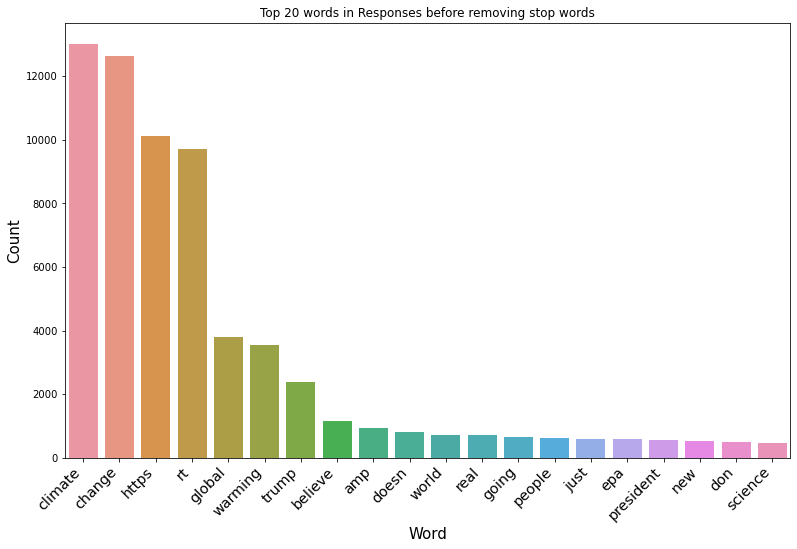

In [28]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['message'], 20)
for word, freq in common_words:
    print(word, freq)
    
new_df = pd.DataFrame(common_words, columns = ['message' , 'count'])

stats_data = new_df.groupby('message').sum()['count'].sort_values(ascending=False)

plt.figure(figsize=(13, 8))
chart = sns.barplot(x='message', y='count', data=new_df)
plt.title('Top 20 words in Responses before removing stop words')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large' 
)
chart.set_xlabel("Word",fontsize=15)
chart.set_ylabel("Count",fontsize=15)

#### Now, we also want to compare bigrams before removing stop words

climate change 12557
https co 9307
global warming 3496
change https 2010
on climate 1255
change is 1102
of climate 960
believe in 934
in climate 858
about climate 652
going to 617
in the 585
doesn believe 581
to climate 577
of the 478
warming is 467
change and 453
the world 412
warming https 406
is real 374


Text(0, 0.5, 'Count')

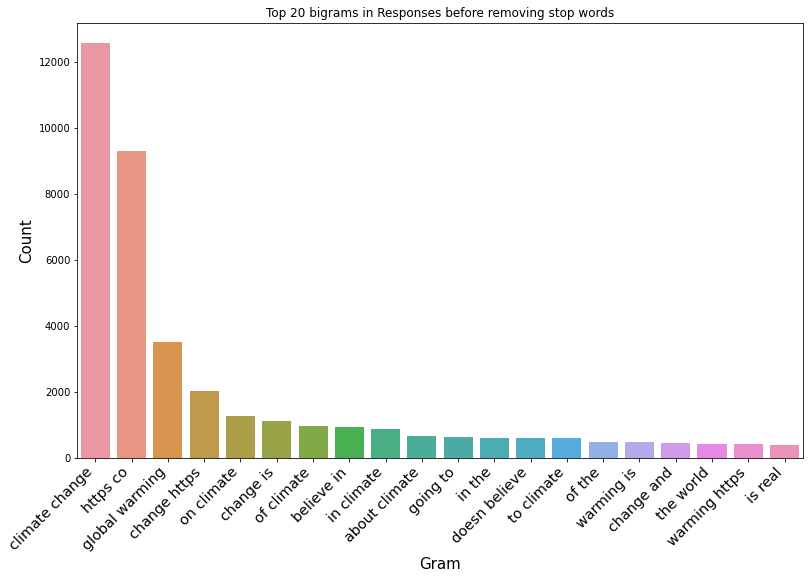

In [29]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['message'], 20)

for word, freq in common_words:
    print(word, freq)

new_df = pd.DataFrame(common_words, columns = ['message' , 'count'])

stats_data = new_df.groupby('message').sum()['count'].sort_values(ascending=False)

plt.figure(figsize=(13, 8))
chart = sns.barplot(x='message', y='count', data=new_df)
plt.title('Top 20 bigrams in Responses before removing stop words')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large' 
)
chart.set_xlabel("Gram",fontsize=15)
chart.set_ylabel("Count",fontsize=15)

#### The distribution of top bigrams after removing stop words

climate change 12557
global warming 3496
change https 2090
believe climate 757
doesn believe 586
warming https 436
donald trump 366
fight climate 346
going die 330
husband doesn 309
thinking going 308
die husband 308
rt stephenschlegel 307
stephenschlegel thinking 307
https sjofonã 307
change real 290
rt sensanders 240
trump climate 232
president elect 226
scott pruitt 202


Text(0, 0.5, 'Count')

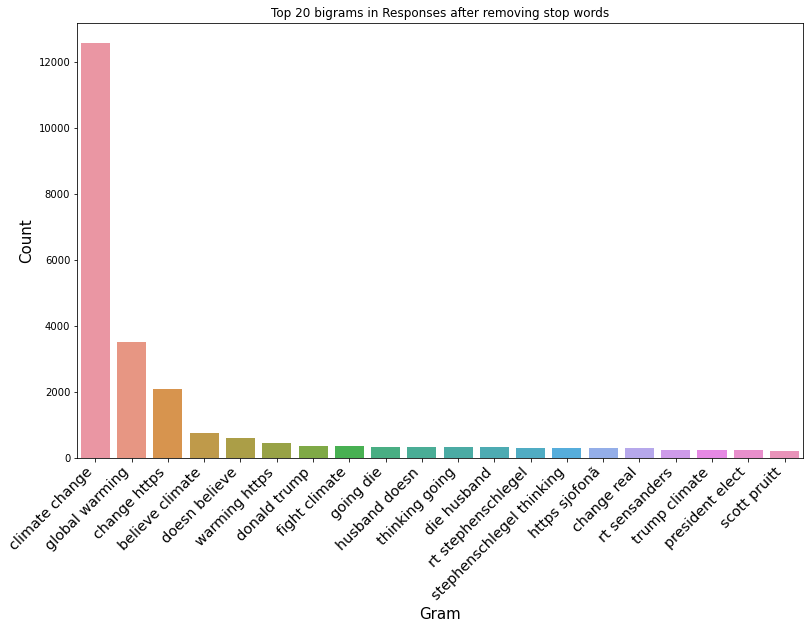

In [30]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(df['message'], 20)
for word, freq in common_words:
    print(word, freq)

new_df = pd.DataFrame(common_words, columns = ['message' , 'count'])

stats_data = new_df.groupby('message').sum()['count'].sort_values(ascending=False)

plt.figure(figsize=(13, 8))
chart = sns.barplot(x='message', y='count', data=new_df)
plt.title('Top 20 bigrams in Responses after removing stop words')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large' 
)
chart.set_xlabel("Gram",fontsize=15)
chart.set_ylabel("Count",fontsize=15)

#### Lastly, we want to compare trigrams before and after removing stop words

climate change https 2007
change https co 1935
on climate change 1235
climate change is 1101
of climate change 938
in climate change 852
believe in climate 707
about climate change 646
to climate change 572
doesn believe in 563
global warming is 466
climate change and 453
global warming https 404
warming https co 388
of global warming 346
going to die 330
thinking about how 310
your husband doesn 309
husband doesn believe 309
she thinking about 308


Text(0, 0.5, 'Count')

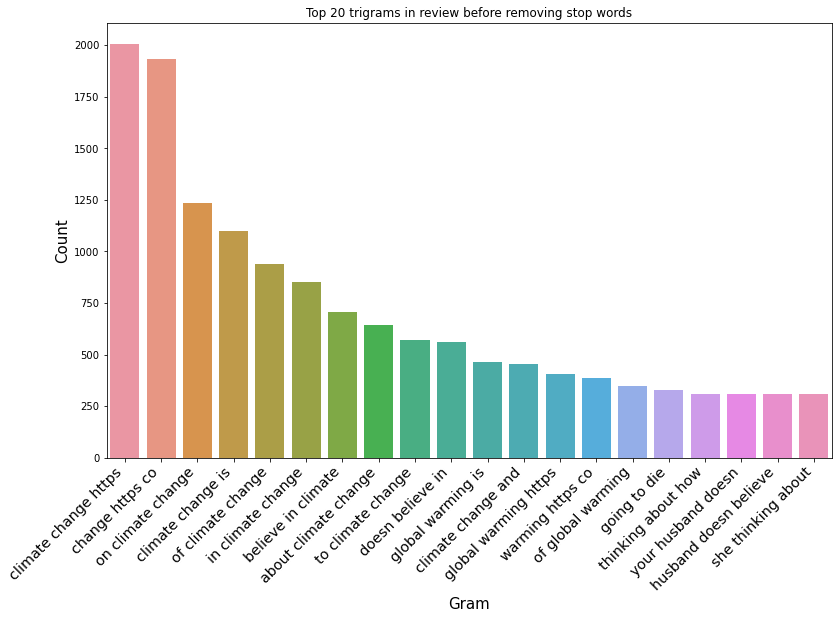

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['message'], 20)
for word, freq in common_words:
    print(word, freq)
    
new_df = pd.DataFrame(common_words, columns = ['message' , 'count'])

stats_data = new_df.groupby('message').sum()['count'].sort_values(ascending=False)

plt.figure(figsize=(13, 8))
chart = sns.barplot(x='message', y='count', data=new_df)
plt.title('Top 20 trigrams in review before removing stop words')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large' 
)
chart.set_xlabel("Gram",fontsize=15)
chart.set_ylabel("Count",fontsize=15)

#### The distribution of top bigrams after removing stop words

climate change https 2084
believe climate change 753
doesn believe climate 518
global warming https 434
fight climate change 345
husband doesn believe 309
thinking going die 308
going die husband 308
die husband doesn 308
rt stephenschlegel thinking 307
stephenschlegel thinking going 307
change https sjofonã 307
climate change real 290
trump climate change 229
climate change denier 193
climate change hoax 189
sensanders president elect 168
rt sensanders president 166
climate change deniers 152
combat climate change 148


Text(0, 0.5, 'Count')

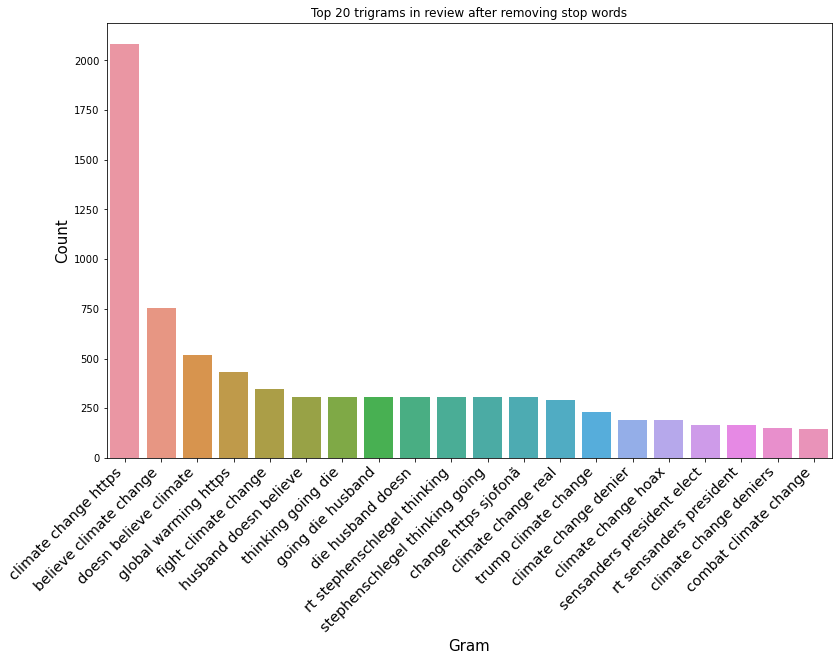

In [32]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(df['message'], 20)
for word, freq in common_words:
    print(word, freq)

new_df = pd.DataFrame(common_words, columns = ['message' , 'count'])

stats_data = new_df.groupby('message').sum()['count'].sort_values(ascending=False)

plt.figure(figsize=(13, 8))
chart = sns.barplot(x='message', y='count', data=new_df)
plt.title('Top 20 trigrams in review after removing stop words')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large' 
)
chart.set_xlabel("Gram",fontsize=15)
chart.set_ylabel("Count",fontsize=15)

### Top Modelling Review Text

Finally, we want to explore topic modeling algorithm to this data set, to see whether it would provide any benefit, and fit with what we are doing for our review text feature.

We will experiment with Latent Semantic Analysis (LSA) technique in topic modeling.

- Generating our document-term matrix from review text to a matrix of TF-IDF features.
- LSA model replaces raw counts in the document-term matrix with a TF-IDF score.
- Perform dimensionality reduction on the document-term matrix using truncated SVD.
- Taking the argmax of each review text in this topic matrix will give the predicted topics of each review text in the    data. We can then sort these into counts of each topic.
- To better understand each topic, we will find the most frequent three words in each topic.

In [33]:
from sklearn.decomposition import TruncatedSVD
import collections
import numpy as np


def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = collections.Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)


def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words
    

reindexed_data = df['message']
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 6
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)


lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  believe doesn going
Topic 2:  https climate change
Topic 3:  sensanders elect president
Topic 4:  warming global rt
Topic 5:  beforetheflood leodicaprio natgeochannel
Topic 6:  berniesanders thinks manufacturing


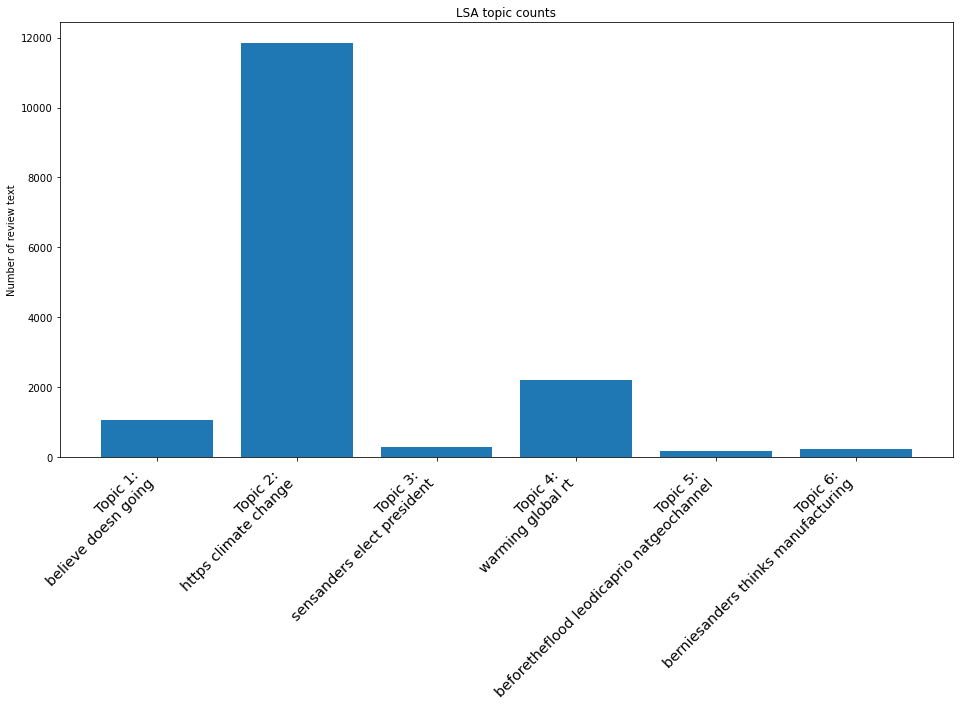

In [34]:
top_3_words = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)
labels = ['Topic {}: \n'.format(i+1) + top_3_words[i] for i in lsa_categories]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of review text');
ax.set_title('LSA topic counts');
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large' 
)
plt.show();

### Splitting the data

- We need to split the data, into training features and training target variables to fit and train the model

In [35]:
#Splitting features and target variables
# import train/test split module

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X = df['message'] #X is the features of the cleaned tweets
y = df['sentiment']    #Y is the target variable which is the train sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) #Splitting train set into training and testing data
#Print out the shape of the training set and the testing set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12655,)
(3164,)
(12655,)
(3164,)


The X_train and y_train both have 12655 values, which is 80% of the data, and the X_test and y_test which represents the test data is 20% of the data wihch will give us an indication of the accuracy

In [36]:
#Import metrics from sklearn
from sklearn import metrics

In [37]:
# import and call the TFidfVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer #Import TFidfVectorizer from sklearn
tfidf = TfidfVectorizer() #Call the TFidfVectorizer and assign it to the tfidf variable

In [38]:
#import CountVectorizer and call it
from sklearn.feature_extraction.text import CountVectorizer #Import CountVectorizer from sklearn

cf= CountVectorizer() #Call the CountVectorizer and assing it to the variable 'cf'

In [39]:
# create a pipeline and fit it with a Logistic Regression
from sklearn.linear_model import LogisticRegression #Import Logistic Regression from sklearn

model = LogisticRegression(multi_class='ovr') #Call the Logistic Regression model and assign it to the variable 'model'

clf = Pipeline([('tfidf', tfidf), ('clf', model)]) #Create a pipeline with the TF-IDF Vectorizer with the logistic model


clf.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred= clf.predict(X_test) #Make predictions and assign the predictions to y_pred

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % metrics.f1_score(y_test,y_pred,average='weighted')) #Print the weighted f1 score
print(classification_report(y_test, y_pred)) #Classification

accuracy 0.8558786346396966
f1_score 0.821889907760804
              precision    recall  f1-score   support

    negative       0.93      0.27      0.42       609
    positive       0.85      1.00      0.92      2555

    accuracy                           0.86      3164
   macro avg       0.89      0.63      0.67      3164
weighted avg       0.87      0.86      0.82      3164



In [40]:
# create a pipeline and fit it with a Logistic Regression
from sklearn.linear_model import LogisticRegression #Import logistic regression model from sklearn

model = LogisticRegression(C=100,multi_class='ovr') #Call logistic regression model and assign variable 'model'

clf_sam1 = Pipeline([('cf', cf), ('clf', model)]) #Create a pipeline with the logistic model and bag-of-words


clf_sam1.fit(X_train, y_train) #Fit the training set

y_pred= clf_sam1.predict(X_test) #Fit the test set

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print accuracy
print('f1_score %s' % metrics.f1_score(y_test,y_pred,average='weighted')) #Print f1 score
print(classification_report(y_test, y_pred)) #Print classification report

C:\Users\tyron\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy 0.9178255372945638
f1_score 0.9140046554951275
              precision    recall  f1-score   support

    negative       0.86      0.68      0.76       609
    positive       0.93      0.97      0.95      2555

    accuracy                           0.92      3164
   macro avg       0.90      0.83      0.86      3164
weighted avg       0.92      0.92      0.91      3164



In [41]:
## create a pipeline and fit it with a Linear Support Vector Classifier
from sklearn.svm import LinearSVC #Import LinearSVC from sklearn 

classifier = LinearSVC() #Call LinearSVC and assign the variable 'classifier'

clf = Pipeline([('tfidf', tfidf), ('clf', classifier)]) #Create a pipeline with the tdidf

clf.fit(X_train, y_train) #Fit the model
y_pred = clf.predict(X_test) #Make predictions and assign the variable 'y_pred'

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % metrics.f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report

accuracy 0.9165613147914032
f1_score 0.9121110907003004
              precision    recall  f1-score   support

    negative       0.87      0.67      0.75       609
    positive       0.92      0.98      0.95      2555

    accuracy                           0.92      3164
   macro avg       0.90      0.82      0.85      3164
weighted avg       0.91      0.92      0.91      3164



In [42]:
#Create a pipeline and make predictions of the bag of words using linearSVC
from sklearn.svm import LinearSVC #Import LinearSVC from the sklearn


clf= Pipeline([('cf', cf),('clf',  LinearSVC())]) #Create a pipeline with the bag or words features and the linearSVC

clf.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = clf.predict(X_test) #Make predictions with the test data

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print out the accuracy
print('f1_score %s' % metrics.f1_score(y_test,y_pred,average='weighted')) #Print out the f1 score
print(classification_report(y_test, y_pred)) #Print out the classification report

accuracy 0.9219342604298356
f1_score 0.9193446967313306
              precision    recall  f1-score   support

    negative       0.85      0.72      0.78       609
    positive       0.94      0.97      0.95      2555

    accuracy                           0.92      3164
   macro avg       0.89      0.84      0.87      3164
weighted avg       0.92      0.92      0.92      3164



In [43]:
## create a pipeline and fit it with a  Support Vector Classifier
from sklearn.svm import SVC #Import SVC from sklearn 

classifier = SVC(kernel='rbf') #Call the SVC with the kernel='rbf' parameter

clf_rbf = Pipeline([('tfidf', tfidf), ('clf', classifier)]) #Add the SVC model to the pipeline

clf_rbf.fit(X_train, y_train) #Fit the training data
y_pred = clf_rbf.predict(X_test) #Make predictions to the test set and assign the variable 'y_pred'

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % metrics.f1_score(y_test,y_pred,average='weighted')) #Print the f1 score
print(classification_report(y_test, y_pred)) #Print out the classification

accuracy 0.8808470290771175
f1_score 0.8615768790873941
              precision    recall  f1-score   support

    negative       0.93      0.41      0.57       609
    positive       0.88      0.99      0.93      2555

    accuracy                           0.88      3164
   macro avg       0.90      0.70      0.75      3164
weighted avg       0.89      0.88      0.86      3164



In [44]:
## create a pipeline and fit it with a  Support Vector Classifier
from sklearn.svm import SVC #Import SVC from sklearn 

classifier = SVC(kernel='rbf') #Call the SVC with the kernel='rbf' parameter

clf_rbfc = Pipeline([('cf', cf), ('clf', classifier)]) #Add the SVC model to the pipeline

clf_rbfc.fit(X_train, y_train) #Fit the training data
y_pred = clf_rbfc.predict(X_test) #Make predictions to the test set and assign the variable 'y_pred'

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % metrics.f1_score(y_test,y_pred,average='weighted')) #Print the f1 score
print(classification_report(y_test, y_pred)) #Print out the classification

accuracy 0.8675726927939317
f1_score 0.8422339814722076
              precision    recall  f1-score   support

    negative       0.91      0.34      0.50       609
    positive       0.86      0.99      0.92      2555

    accuracy                           0.87      3164
   macro avg       0.89      0.67      0.71      3164
weighted avg       0.87      0.87      0.84      3164



In [45]:
test_x = df['message'] #Take test messages and assign variable test_x

In [46]:
y_pred = clf_rbf.predict(test_x) #Make rbf predictions and assign to t_pred

In [47]:
df['sentiment'] = y_pred 
mapper = {"positive":1, "negative":0}

df["sentiment"] = df.sentiment.map(mapper)
df

,sentiment,message,tweetid,word_count,char_count,word_density,punc_count,polarity,subjectivity
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,19,122,0.154472,12,0.083333,0.166667
1,1,It's not like we lack evidence of anthropogeni...,126103,10,53,0.185185,1,0.000000,0.000000
2,0,RT @RawStory: Researchers say we have three ye...,698562,19,122,0.154472,12,-0.300000,0.600000
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,15,85,0.174419,8,0.500000,0.800000
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,18,105,0.169811,8,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
15814,0,RT @ezlusztig: They took down the material on ...,22001,22,119,0.183333,11,-0.077778,0.144444
15815,1,RT @washingtonpost: How climate change could b...,17856,13,107,0.120370,10,0.000000,0.000000
15816,1,notiven: RT: nytimesworld :What does Trump act...,384248,19,115,0.163793,9,-0.062500,0.237500
15817,0,RT @sara8smiles: Hey liberals the climate chan...,819732,21,109,0.190909,4,-0.800000,0.800000


In [48]:
df[['tweetid', 'sentiment']].to_csv('model_final.csv', index=False)#Extract twitter ID as sentiments to submit to kaggle

In [49]:
df.info

<bound method DataFrame.info of        sentiment                                            message  tweetid  \
0              1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1              1  It's not like we lack evidence of anthropogeni...   126103   
2              0  RT @RawStory: Researchers say we have three ye...   698562   
3              1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4              1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   
...          ...                                                ...      ...   
15814          0  RT @ezlusztig: They took down the material on ...    22001   
15815          1  RT @washingtonpost: How climate change could b...    17856   
15816          1  notiven: RT: nytimesworld :What does Trump act...   384248   
15817          0  RT @sara8smiles: Hey liberals the climate chan...   819732   
15818          1  RT @Chet_Cannon: .@kurteichenwald's 'climate c...   806319   

       

In [50]:
df_submit = df[:10546]

In [51]:
df_submit.to_csv()

',sentiment,message,tweetid,word_count,char_count,word_density,punc_count,polarity,subjectivity\r\n0,1,"PolySciMajor EPA chief doesn\'t think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,19,122,0.15447154471544716,12,0.08333333333333333,0.16666666666666666\r\n1,1,It\'s not like we lack evidence of anthropogenic global warming,126103,10,53,0.18518518518518517,1,0.0,0.0\r\n2,0,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,19,122,0.15447154471544716,12,-0.3,0.6\r\n3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,15,85,0.1744186046511628,8,0.5,0.8\r\n4,1,"RT @SoyNovioDeTodas: It\'s 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,18,105,0.16981132075471697,8,0.0,0.0\r\n5,1,Worth a read whether you do or don\

In [52]:
df_submit.shape

(10546, 9)

In [53]:
df_submit.head()

,sentiment,message,tweetid,word_count,char_count,word_density,punc_count,polarity,subjectivity
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,19,122,0.154472,12,0.083333,0.166667
1,1,It's not like we lack evidence of anthropogeni...,126103,10,53,0.185185,1,0.000000,0.000000
2,0,RT @RawStory: Researchers say we have three ye...,698562,19,122,0.154472,12,-0.300000,0.600000
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,15,85,0.174419,8,0.500000,0.800000
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,18,105,0.169811,8,0.000000,0.000000
